In [1]:
from sklearn.datasets import load_breast_cancer, load_iris, load_boston, make_classification, make_blobs, make_regression, make_friedman1
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Imputer
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import pandas as pd
imputer = Imputer(strategy= 'median')
encoder = OneHotEncoder() # int category 
#pd.factorize() # category to int

Using TensorFlow backend.


In [2]:
# functions
def get_xy(name, stratify = None):
    X = pd.DataFrame(MinMaxScaler().fit_transform(name.data), columns = name.feature_names)
    y = name.target
    if stratify == None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 20)
    return X_train, X_test, y_train, y_test

# adspy_shared_utilities.py
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, 
                                      plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)
        
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []

# adspy_shared_utilities.py        
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min - k, x_max + k, h), np.arange(y_min - k, y_max + k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

### Classifier

#### Data

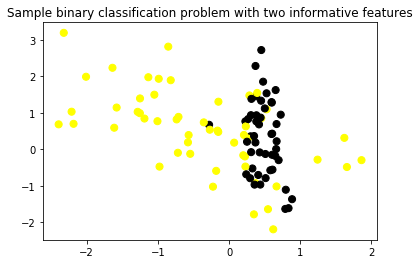

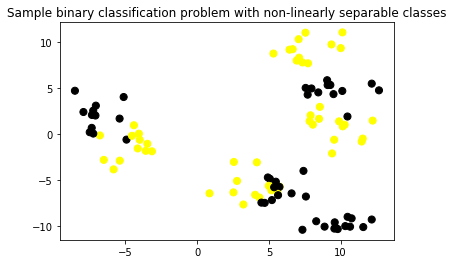

In [5]:
# iris data
X_train, X_test, y_train, y_test = get_xy(load_iris(),True)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# Data c    
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y = 0.1, class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',c=y_C2, s=50, cmap=cmap_bold)
plt.show()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_C2, y_C2, random_state=0)

# Data d
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_D2, y_D2, random_state=0)

# fruits data
fruits = pd.read_csv('fruit_data_with_colors.csv')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### KNeighborsClassifier

0.9545454545454546 0.9333333333333333


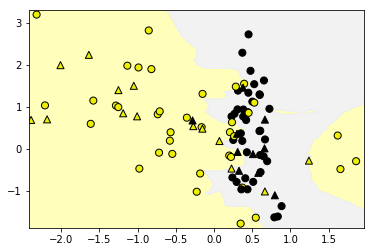

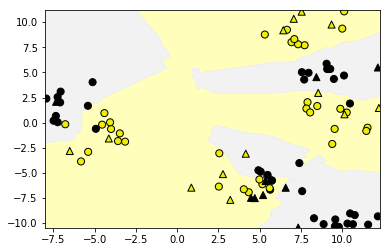

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
print(knc.score(X_train, y_train), knc.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=3).fit(Xc_train, yc_train)
plot_class_regions_for_classifier(clf, Xc_train, yc_train, Xc_test, yc_test, 'KNeighborClassifier: data c')

clf = KNeighborsClassifier(n_neighbors=5).fit(Xd_train, yd_train)
plot_class_regions_for_classifier(clf, Xd_train, yd_train, Xd_test, yd_test, 'KNeighborClassifier: data d')

#### naive_bayes

0.8636363636363636 0.6666666666666666


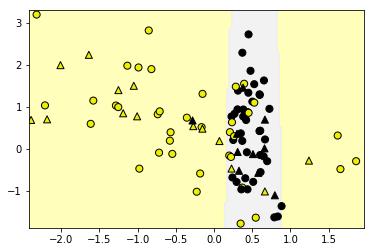

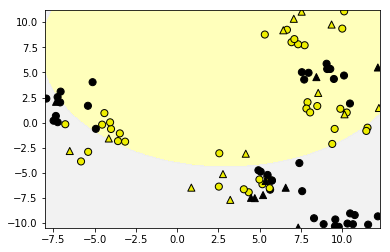

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)
print(nb.score(X_train, y_train), nb.score(X_test, y_test))

clf = GaussianNB().fit(Xc_train, yc_train)
plot_class_regions_for_classifier(clf, Xc_train, yc_train, Xc_test, yc_test, 'KNeighborClassifier: data c')

clf = GaussianNB().fit(Xd_train, yd_train)
plot_class_regions_for_classifier(clf, Xd_train, yd_train, Xd_test, yd_test, 'KNeighborClassifier: data d')

#### cross_val_score, StratifiedKFold

In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, LeaveOneOut

print(cross_val_score(KNeighborsClassifier(),X_train, y_train, cv = StratifiedKFold(5, shuffle = True, random_state = 10)))
print(cross_val_score(KNeighborsClassifier(),X_train, y_train, cv =5))

scores = cross_val_score(KNeighborsClassifier(),X_train, y_train, cv = LeaveOneOut())
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

[0.8        0.88888889 1.         0.875      0.875     ]
[0.9        0.88888889 0.77777778 1.         1.        ]
Number of cv iterations:  44
Mean accuracy: 0.95


d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


#### LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X_train, y_train)
print(logr.score(X_train, y_train), logr.score(X_test, y_test))

0.7045454545454546 0.4


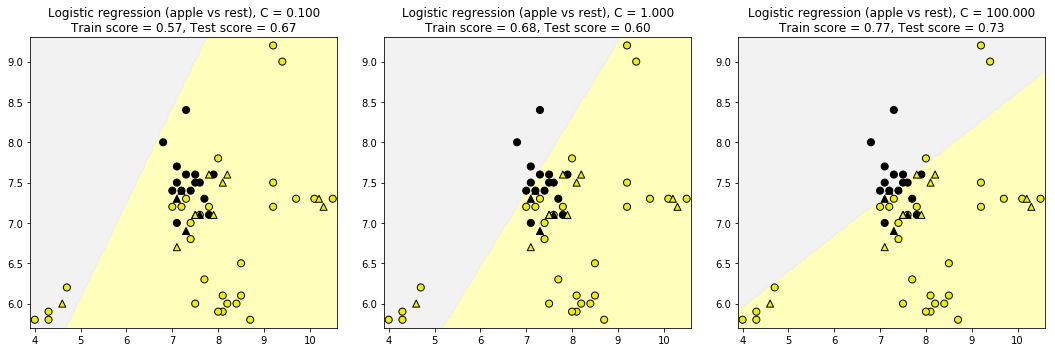

In [10]:
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
Xf_train, Xf_test, yf_train, yf_test = (train_test_split(X_fruits_2d.as_matrix(),y_fruits_apple.as_matrix(),random_state=0))

fig, subaxes = plt.subplots(1, 3, figsize=(15, 5))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(Xf_train, yf_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, Xf_train, yf_train,
                                             Xf_test, yf_test, title,
                                             subplot)
plt.tight_layout()

#### SVM

In [11]:
from sklearn.svm import LinearSVC, SVC

lsvc = LinearSVC(C = 3).fit(X_train, y_train)
print(lsvc.score(X_train, y_train), lsvc.score(X_test, y_test))

svc = SVC(C =4).fit(X_train, y_train)
print(svc.score(X_train, y_train), svc.score(X_test, y_test))

0.7954545454545454 0.4
0.7954545454545454 0.5333333333333333


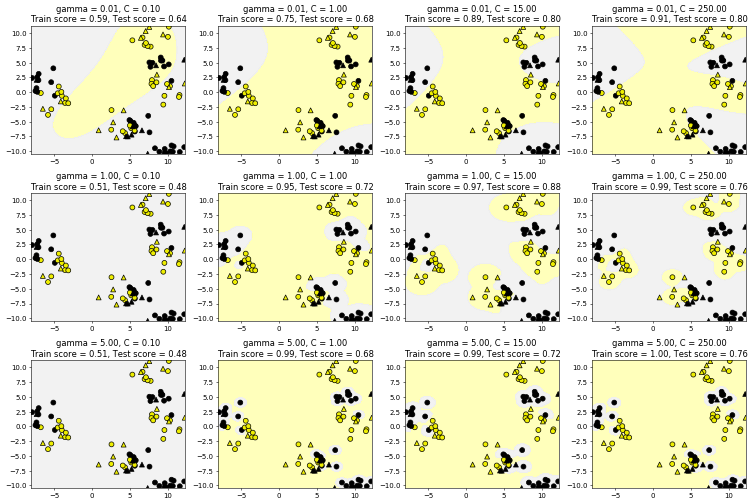

In [12]:
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(Xd_train, yd_train)
        plot_class_regions_for_classifier_subplot(clf, Xd_train, yd_train,
                                                 Xd_test, yd_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#### DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

tc = DecisionTreeClassifier(max_depth =4).fit(X_train, y_train)
print(tc.score(X_train, y_train), tc.score(X_test, y_test))

0.9318181818181818 0.6


#### VotingClassifier


In [14]:
from sklearn.ensemble import VotingClassifier

hard_voting_clf = VotingClassifier(estimators=[('KNC', knc),('LogisticRegression', logr),('SVC',svc),('LinearSVC',lsvc)], voting = 'hard')
hard_voting_clf.fit(X_train, y_train)
print(hard_voting_clf.score(X_train, y_train), hard_voting_clf.score(X_test, y_test))


soft_voting_clf = VotingClassifier(estimators=[('KNC', knc),('LogisticRegression', logr),('SVC',SVC(C =4,probability= True))], voting = 'soft')
soft_voting_clf.fit(X_train, y_train)
print(soft_voting_clf.score(X_train, y_train), soft_voting_clf.score(X_test, y_test))

0.7954545454545454 0.5333333333333333
0.9545454545454546 0.8666666666666667


d:\program files (x86)\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\program files (x86)\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\program files (x86)\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\program files (x86)\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

#### Bagging and pasting
Another way to get a diverse set of classifiers is to use the same training algorithm for every predictor, but to train them on different random subset of the training set. When sampling is perfomed with placement, this method is called bagging. When sampling is performed without replacement, it is called pasting. 

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. 

The aggregation function is typically the statictical mode (like most frequent) for classification, or average for regression.

In [15]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42) , n_estimators = 100, max_features = 3, bootstrap = True,oob_score= True).fit(X_train,y_train)

pasting_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42) , n_estimators = 100, max_features = 3, bootstrap = False).fit(X_train,y_train)

print(bagging_clf.oob_score_)
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_test,y_test)))
print('Train score: {0:0.2f}'.format(pasting_clf.score(X_test,y_test)))

0.9090909090909091
Train score: 0.80
Train score: 0.93


#### AdaBoostClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = LogisticRegression(penalty='l1'), learning_rate = 0.5).fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.34
Test score: 0.27


#### Gradient-boosted decision trees

Like random forest, gradient boosted trees used an ensemble of multiple tress to create more powerful prediction models for classification and regression. 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate = 0.05).fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Feature Importance:',(gb_clf.feature_importances_))

Train score: 1.00
Test score: 0.80
Feature Importance: [0.35578896 0.15480487 0.22067635 0.26622983]


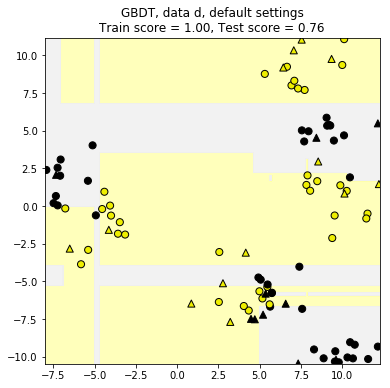

In [18]:
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(Xd_train, yd_train)
title = 'GBDT, data d, default settings'
plot_class_regions_for_classifier_subplot(clf, Xd_train, yd_train, Xd_test,
                                         yd_test, title, subaxes)

plt.show()

#### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_features =3, random_state = 0).fit(X_train, y_train)
print(rforest.score(X_train, y_train), rforest.score(X_test, y_test))

1.0 0.8


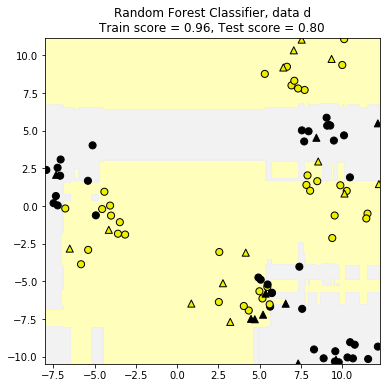

In [20]:
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(Xd_train, yd_train)
title = 'Random Forest Classifier, data d'
plot_class_regions_for_classifier_subplot(clf, Xd_train, yd_train, Xd_test, yd_test, title, subaxes)

plt.show()

### Regression

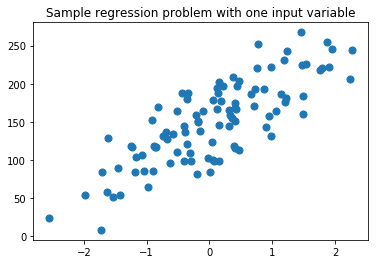

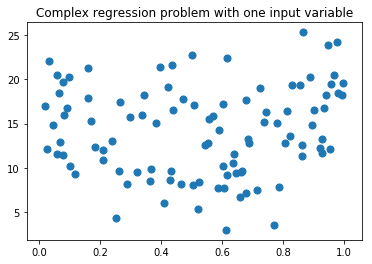

In [21]:
X_train, X_test, y_train, y_test = get_xy(load_boston())

# synthetic dataset for simple regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1, n_informative=1, bias = 150.0, noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

#### KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
print(knr.score(X_train, y_train), knr.score(X_test, y_test))

0.8845581692412638 0.7628280151505998


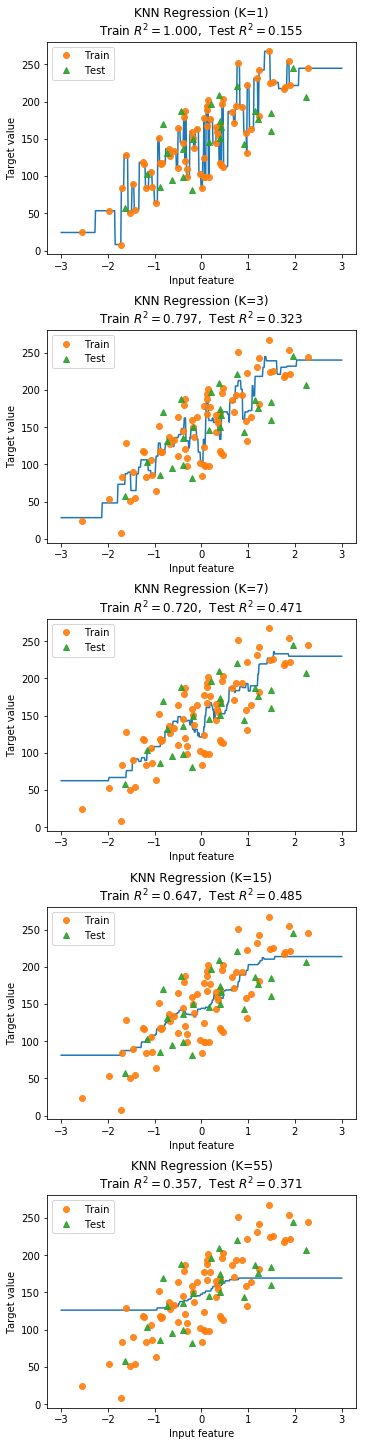

In [23]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(Xr_train, yr_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(Xr_train, yr_train)
    test_score = knnreg.score(Xr_test, yr_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(Xr_train, yr_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(Xr_test, yr_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#### Simple Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print(lasso.score(X_train, y_train), lasso.score(X_test, y_test))

ridge = Ridge(alpha=0.1,max_iter = 10000).fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.7418953646117235 0.7183920982389489
0.701846916510005 0.6499686528779014
0.7418394699726107 0.7177090499207088


In [25]:
param = {'alpha':[0.01,0.1,1,10,100]}
grid = GridSearchCV(ridge,param_grid=param, cv = 10).fit(X_train, y_train)
grid.best_estimator_, grid.best_score_

(Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=10000,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 0.7009963867710726)

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Ridge(alpha = 1), X_train, y_train, cv = 5)
print(scores)

[0.73835746 0.7320682  0.63874127 0.63455678 0.78311672]


In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train)
x_train = poly.transform(X_train)
x_test = poly.transform(X_test)

lr = LinearRegression().fit(x_train, y_train)
print(lr.score(x_train, y_train), lr.score(x_test, y_test))

ridge = Ridge(alpha=0.1).fit(x_train, y_train)
print(ridge.score(x_train, y_train), ridge.score(x_test, y_test))

0.9437193459821196 0.7532778138663703
0.9152226181831774 0.8414584325400841


In [28]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear',epsilon=0.1).fit(X_train, y_train)
print(svr.score(X_train, y_train), svr.score(X_test, y_test))

svr = SVR(kernel = 'poly',epsilon=0.1).fit(X_train, y_train)
print(svr.score(X_train, y_train), svr.score(X_test, y_test))

0.6269010982102551 0.6150078698409243
0.10990930375737662 0.12808834241760947


In [29]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)
print(tr.score(X_train, y_train), tr.score(X_test, y_test))

0.7256643145772705 0.6013480362092322


### Neural networks

### activation

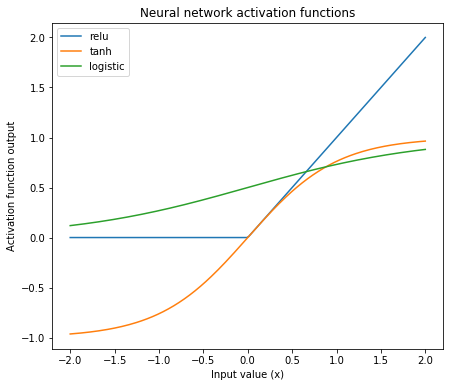

In [30]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

#### Classifier

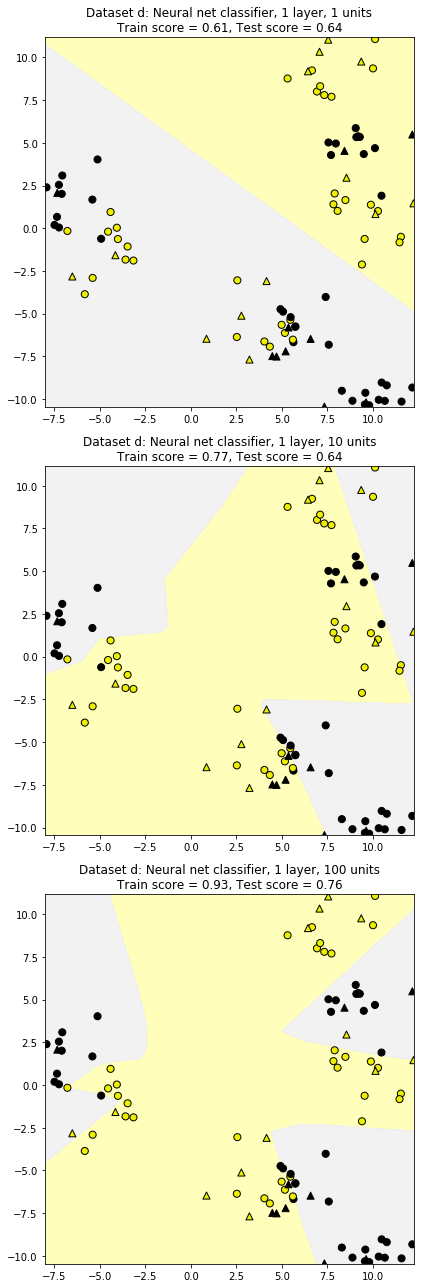

In [31]:
from sklearn.neural_network import MLPClassifier
# Single layer
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(Xd_train, yd_train)
    
    title = 'Dataset d: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, Xd_train, yd_train,
                                             Xd_test, yd_test, title, axis)
    plt.tight_layout()

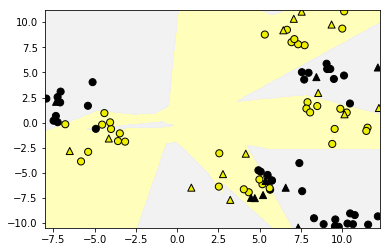

In [32]:
# two layers
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(Xd_train, yd_train)

plot_class_regions_for_classifier(nnclf, Xd_train, yd_train, Xd_test, yd_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

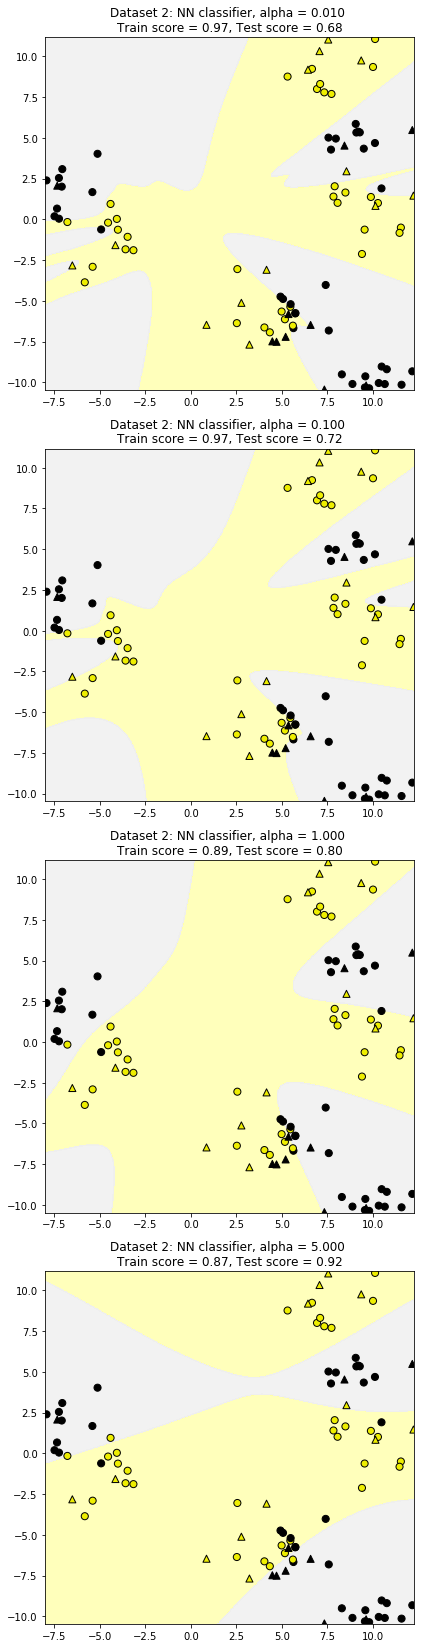

In [33]:
# alpha
fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(Xd_train, yd_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, Xd_train, yd_train,
                                             Xd_test, yd_test, title, axis)
    plt.tight_layout()
    

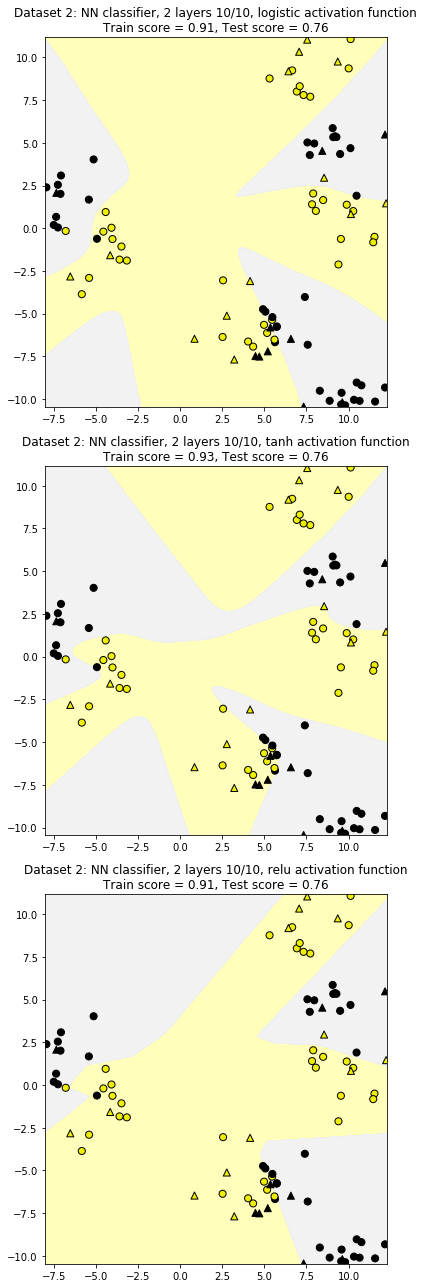

In [34]:
# activation function

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(Xd_train, yd_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, Xd_train, yd_train,
                                             Xd_test, yd_test, title, axis)
    plt.tight_layout()

In [35]:
X_train, X_test, y_train, y_test = get_xy(load_breast_cancer(), True)


clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.99


#### Regression

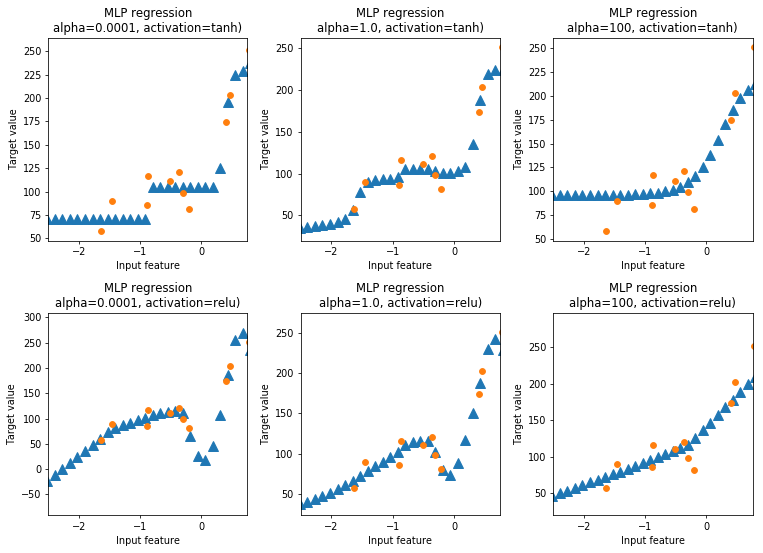

In [36]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,'^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

#### Keras

In [37]:
from keras.models import Sequential
from keras.layers import Dense

#### Classifier

In [38]:
X_train, X_test, y_train, y_test = get_xy(load_breast_cancer(), True)

model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=20)

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
426/426 [==============================] - 0s 714us/step - loss: 0.6785 - acc: 0.6526
Epoch 2/200
426/426 [==============================] - 0s 82us/step - loss: 0.6439 - acc: 0.7793
Epoch 3/200
426/426 [==============================] - 0s 89us/step - loss: 0.5925 - acc: 0.8216
Epoch 4/200
426/426 [==============================] - 0s 89us/step - loss: 0.5334 - acc: 0.8568
Epoch 5/200
426/426 [==============================] - 0s 92us/step - loss: 0.4827 - acc: 0.8662
Epoch 6/200
426/426 [==============================] - 0s 96us/step - loss: 0.4357 - acc: 0.8662
Epoch 7/200
426/426 [==============================] - 0s 94us/step - loss: 0.3955 - acc: 0.8826
Epoch 8/200
426/426 [==============================] - 0s 96us/step - loss: 0.3592 - acc: 0.8967
Epoch 9/200
426/426 [==============================] - 0s 106us/step - loss: 0.3280 - acc: 0.8944
Epoch 10/200
426/426 [==============================] - 0s 85us/step - loss: 0.3026 - acc: 0.8920
Epoch 11/200
426/426 [=====

426/426 [==============================] - 0s 85us/step - loss: 0.0561 - acc: 0.9765
Epoch 85/200
426/426 [==============================] - 0s 87us/step - loss: 0.0582 - acc: 0.9765
Epoch 86/200
426/426 [==============================] - 0s 80us/step - loss: 0.0569 - acc: 0.9789
Epoch 87/200
426/426 [==============================] - 0s 94us/step - loss: 0.0557 - acc: 0.9742
Epoch 88/200
426/426 [==============================] - 0s 113us/step - loss: 0.0545 - acc: 0.9765
Epoch 89/200
426/426 [==============================] - 0s 92us/step - loss: 0.0535 - acc: 0.9789
Epoch 90/200
426/426 [==============================] - 0s 103us/step - loss: 0.0543 - acc: 0.9789
Epoch 91/200
426/426 [==============================] - 0s 124us/step - loss: 0.0566 - acc: 0.9789
Epoch 92/200
426/426 [==============================] - 0s 124us/step - loss: 0.0535 - acc: 0.9765
Epoch 93/200
426/426 [==============================] - 0s 115us/step - loss: 0.0534 - acc: 0.9812
Epoch 94/200
426/426 [======

426/426 [==============================] - 0s 89us/step - loss: 0.0436 - acc: 0.9859
Epoch 167/200
426/426 [==============================] - 0s 89us/step - loss: 0.0420 - acc: 0.9836
Epoch 168/200
426/426 [==============================] - 0s 80us/step - loss: 0.0421 - acc: 0.9836
Epoch 169/200
426/426 [==============================] - 0s 87us/step - loss: 0.0412 - acc: 0.9836
Epoch 170/200
426/426 [==============================] - 0s 87us/step - loss: 0.0410 - acc: 0.9836
Epoch 171/200
426/426 [==============================] - 0s 94us/step - loss: 0.0426 - acc: 0.9836
Epoch 172/200
426/426 [==============================] - 0s 80us/step - loss: 0.0434 - acc: 0.9812
Epoch 173/200
426/426 [==============================] - 0s 89us/step - loss: 0.0412 - acc: 0.9836
Epoch 174/200
426/426 [==============================] - 0s 80us/step - loss: 0.0420 - acc: 0.9812
Epoch 175/200
426/426 [==============================] - 0s 99us/step - loss: 0.0427 - acc: 0.9836
Epoch 176/200
426/426 [=

In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=30, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
param_grid = {'epochs':[50,100,200], 'batch_size':[5,10,20,50,100]}
keras_classifier = KerasClassifier(build_fn = create_model, verbose = 0)
# grid = GridSearchCV(keras_classifier, param_grid, cv = 10).fit(X_train, y_train)
# grid.best_params_
# {'batch_size': 20, 'epochs': 200}

#### Regression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(load_boston().data, load_boston().target)


model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

model.fit(X_train, y_train, epochs = 100, batch_size = 20)

model.evaluate(X_test, y_test)

Epoch 1/100
379/379 [==============================] - 0s 780us/step - loss: 587.8346 - mean_squared_error: 587.8346
Epoch 2/100
379/379 [==============================] - 0s 108us/step - loss: 530.8247 - mean_squared_error: 530.8247
Epoch 3/100
379/379 [==============================] - 0s 87us/step - loss: 339.4227 - mean_squared_error: 339.4227
Epoch 4/100
379/379 [==============================] - 0s 79us/step - loss: 162.8373 - mean_squared_error: 162.8373
Epoch 5/100
379/379 [==============================] - 0s 82us/step - loss: 140.1075 - mean_squared_error: 140.1075
Epoch 6/100
379/379 [==============================] - 0s 74us/step - loss: 124.7175 - mean_squared_error: 124.7175
Epoch 7/100
379/379 [==============================] - 0s 74us/step - loss: 113.1651 - mean_squared_error: 113.1651
Epoch 8/100
379/379 [==============================] - 0s 87us/step - loss: 103.9396 - mean_squared_error: 103.9396
Epoch 9/100
379/379 [==============================] - 0s 100us/step -

Epoch 72/100
379/379 [==============================] - 0s 132us/step - loss: 35.9644 - mean_squared_error: 35.9644
Epoch 73/100
379/379 [==============================] - 0s 106us/step - loss: 35.2527 - mean_squared_error: 35.2527
Epoch 74/100
379/379 [==============================] - 0s 111us/step - loss: 34.2552 - mean_squared_error: 34.2552
Epoch 75/100
379/379 [==============================] - 0s 98us/step - loss: 33.9850 - mean_squared_error: 33.9850
Epoch 76/100
379/379 [==============================] - 0s 137us/step - loss: 33.8652 - mean_squared_error: 33.8652
Epoch 77/100
379/379 [==============================] - 0s 135us/step - loss: 33.2415 - mean_squared_error: 33.2415
Epoch 78/100
379/379 [==============================] - ETA: 0s - loss: 33.5795 - mean_squared_error: 33.57 - 0s 182us/step - loss: 32.7756 - mean_squared_error: 32.7756
Epoch 79/100
379/379 [==============================] - 0s 206us/step - loss: 32.5432 - mean_squared_error: 32.5432
Epoch 80/100
379/37

[25.196988323542076, 25.196988323542076]

In [41]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.70
Test r2: 0.69
